# Security Breaches 2004 - 2017

This report analysis of security breaches between the year of 2004 to 2017 will address at what rate are organizations and sectors hacked and under what cause.

Historical data is stored on Kaggle: [Data Breaches 2004-2017 (EN)](https://www.kaggle.com/estratic/data-breaches-2004-2017-en-20180218?select=Data_Breaches_EN_V2_2004_2017_20180220.csv)

Acknowlegdement to Charles E. Jimenez-Gomez for collecting the data.

##### see README file for data dictionay

### Import Pandas & Plotting

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Read Datafile

In [2]:
#Semicolon is the default seperator in the csv
data = pd.read_csv('Data_Breaches.csv', sep=";")
data.shape

(270, 11)

### Basic Statistics on the Data Set

There are 270 well known entities including unique factors based on 11 statistics collected.

All the data are string and integer point values. This includes the date's and link's. 

In [3]:
data.shape

(270, 11)

In [4]:
pd.DataFrame(data.dtypes, columns = ['DataTypes'])

,DataTypes
Entity,object
Alternative Name,object
Story,object
Year,int64
Records Lost,object
Sector,object
Method of Leak,object
1st source,object
2nd source,object
3rd source,object


### Analysis of Data Quality

Checking the begining and end of the data set:

In [5]:
data.head(3)

,Entity,Alternative Name,Story,Year,Records Lost,Sector,Method of Leak,1st source,2nd source,3rd source,Source name
0,River City Media,Spam operator,A dodgy backup has allegedly resulted in over ...,2017,"1,37e+09",Web,Accidentally published,https://betanews.com/2017/03/06/river-city-med...,NaN,NaN,Beta News
1,Unique Identification Authority of India,Aadhaar data base,A report says that full data base has been exp...,2017,1e+09,Government,Poor security,http://www.tribuneindia.com/news/nation/rs-500...,http://www.livemint.com/Opinion/MUPJK28VMeoICz...,NaN,NaN
2,Spambot,NaN,A misconfigured spambot has leaked over 700m r...,2017,"7,11e+08",Web,Poor security,https://www.theguardian.com/technology/2017/au...,NaN,NaN,The Guardian


In [6]:
data.tail(3)

,Entity,Alternative Name,Story,Year,Records Lost,Sector,Method of Leak,1st source,2nd source,3rd source,Source name
267,Ameritrade Inc.,Online broker,Computer backup tape containing personal infor...,2005,2e+05,Financial,Lost / stolen device or media,http://www.nbcnews.com/id/7561268/,NaN,NaN,NBC
268,Automatic Data Processing,"Business outsourcing, payrolls, benefits",NaN,2005,125000,Financial,Poor security,http://abcnews.go.com/Technology/story?id=2160...,NaN,NaN,ABC
269,AOL,American Online,A former America Online software engineer stol...,2004,"9,2e+07",Web,Inside job,http://money.cnn.com/2004/06/23/technology/aol...,http://www.msnbc.msn.com/id/8985989/#.UFcN8RgUwaA,NaN,CNN


### Basic Analysis of the Data

There are empty and NaN values found in the data:
    
    1. Some entities do not have an alternative names. No need to be redundent.
    
    2. Some entities do not have a story. No story doesn't address the question of why it happened!
    
    3. Some entities are missing a 2nd and 3rd resource.
    
Presumibly the data collection may have been incomplete.

### Cleaning the Data

#### Strategy

Create a subset of data with complete collection of statistics and analysis:

    1. Eliminate the alernative name column.
    
    2. Merge the 1st, 2nd, and 3rd source column into one and name it sources. No need to be redundent.
    
    3. Eliminate the row of entities with no story. It's not relevant without a story. 

The goal is to remove empty and NaN values that will not be used in the analysis. Then save the data in a new csv.
  

### Dropping the Alternative Name Column

In [7]:
data.drop('Alternative Name', axis=1, inplace = True )

### Combined 1st, 2nd, and 3rd source columns into one and named it sources

In [8]:
data['Sources']=data['1st source'].astype(str)+','+data['2nd source'].astype(str)+','+data['3rd source'].astype(str)
data.drop(['1st source','2nd source','3rd source'], axis=1, inplace = True)

### Drops all the rows with NaN vaules

In [9]:
data.dropna(inplace=True)

### Verifying the results of the refactor

In [10]:
data

,Entity,Story,Year,Records Lost,Sector,Method of Leak,Source name,Sources
0,River City Media,A dodgy backup has allegedly resulted in over ...,2017,"1,37e+09",Web,Accidentally published,Beta News,https://betanews.com/2017/03/06/river-city-med...
2,Spambot,A misconfigured spambot has leaked over 700m r...,2017,"7,11e+08",Web,Poor security,The Guardian,https://www.theguardian.com/technology/2017/au...
3,Friend Finder Network,"Usernames, email addresses, passwords for site...",2016,"4,12e+08",Web,Hacked,ZDNet / LeakedSource,http://www.zdnet.com/article/adultfriendfinder...
4,Equifax,"If you have a credit report, there’s a good ch...",2017,"1,43e+08",Financial,Hacked,UK Gov,https://www.consumer.ftc.gov/blog/2017/09/equi...
5,Dailymotion,"85.2m email addresses extracted, but only 18.3...",2016,85200000,Web,Hacked,ZDNet,http://www.zdnet.com/article/dailymotion-hack-...
...,...,...,...,...,...,...,...,...
264,Hewlett Packard,Laptop lost/stolen containing employee data: n...,2006,2e+05,Tech,Lost / stolen device or media,CNET,http://news.cnet.com/Laptop-with-HP-employee-d...
265,Cardsystems Solutions Inc.,CardSystems was fingered by MasterCard after i...,2005,4e+07,Financial,Hacked,MSNBC,http://www.msnbc.msn.com/id/8260050/ns/technol...
266,Citigroup,Blame the messenger! A box of computer tapes c...,2005,3900000,Financial,Lost / stolen device or media,NY Times,http://www.nytimes.com/2005/06/07/business/07d...
267,Ameritrade Inc.,Computer backup tape containing personal infor...,2005,2e+05,Financial,Lost / stolen device or media,NBC,"http://www.nbcnews.com/id/7561268/,nan,nan"


### Saving the new data into a new csv

In [11]:
data.to_csv('Data_Breaches_Cleandata', index = False)

### Analysis of the data
    

##### Security breaches based on sector:

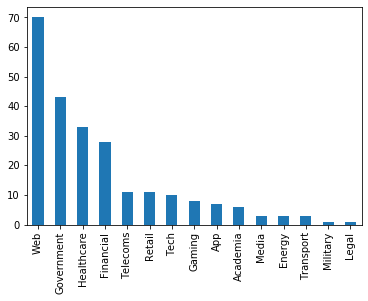

In [12]:
data.Sector.value_counts().plot(kind='bar')

Here we can see according to the data, companies in the web sector are prone to cyber attacks.

    Web companies: Amazon, AOL, Dropbox, Yahoo, etc. 

    *Could be because these entities conduct business on the world wide web they're more at risk?*

It's easy to conclude that cyber actors are highly interested in the Government, Healthcare, and Financial sector's compared to the rest.

##### Fun Fact: U.S. government to spend 15 billion on cyber security and then some a year!

###### Security breaches based on years:

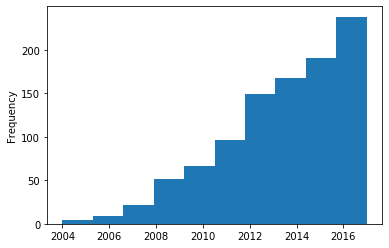

In [13]:
data['Year'].plot.hist(orientation='vertical', cumulative=True)

According to this histagram these attacks have only increased throughout the years at a rapid pace.
    
    Why? Internet Accessibility! 
        *Dail-up > DSL > Fiber > Satellite*
        
*Evolution of web technology:*
    1. VPN's
    2. Proxy's
    3. Onion Browser
    4. Hacking tools:
[John the Ripper](https://www.openwall.com/john/)

[Wireshark](https://www.wireshark.org/)

[Metasploit](https://www.metasploit.com/)

[hak5](https://shop.hak5.org/)

Not to mention: Free and/or affordable hacking courses.

[Hack The Box](https://www.hackthebox.eu/)

[TryHackMe](https://tryhackme.com/)

##### Fun Fact: The average growth rate for all occupations is 4 percent. Cybersecurity is at 31 percent (Much faster than average)


##### Who, Why, and Records Lost:

In [14]:
recordslost = data.head()[['Entity','Story', 'Records Lost']]\
                  .groupby('Records Lost')
recordslost.head()

,Entity,Story,Records Lost
0,River City Media,A dodgy backup has allegedly resulted in over ...,"1,37e+09"
2,Spambot,A misconfigured spambot has leaked over 700m r...,"7,11e+08"
3,Friend Finder Network,"Usernames, email addresses, passwords for site...","4,12e+08"
4,Equifax,"If you have a credit report, there’s a good ch...","1,43e+08"
5,Dailymotion,"85.2m email addresses extracted, but only 18.3...",85200000




##### Fun Facted: Cost of the average data breach to companies worldwide: 3.86 million (U.S. dollars)


### Conclusions

    1. Entities that conduct business on the web are breached more than any other sectors. 
    
    2. Data breached have only increased throughout the years and continue to increase.
    
##### Fun Fact: Over 80 percent of breaches us stolen and/or weak passwords

[HOW SECURE IS MY PASSWORD?](https://howsecureismypassword.net/)

[haveibeenpwned](https://haveibeenpwned.com/)

### Recommendation for Further Research

Data breaches represent threats and vulnerbilities. Regardless the types of breaches are different, the impacts are not always the same. Some companies have risk acceptance. Therefore, my recommendation is to *expand research on monetary loss and number of time they have been hacked.*

Also include a column on the type of attack: 

* Denial-of-service (DoS) and distributed denial-of-service (DDoS) attacks
* Man-in-the-middle (MitM) attack
* Phishing and spear phishing attacks
* Drive-by attack
* Password attack
* SQL injection attack
* Cross-site scripting (XSS) attack
* Eavesdropping attack
* Birthday attack
* Malware attack